In [61]:
import os
import numpy as np
import ants
import copy

In [2]:
indir = '/Volumes/Samsung_T5/DS-use-new-atlas/'

In [9]:
folders = os.listdir(indir)
folders.sort()
folders = np.array(folders)
folders

array(['sub-004', 'sub-008', 'sub-012', 'sub-014', 'sub-018', 'sub-025',
       'sub-029', 'sub-030', 'sub-039', 'sub-040', 'sub-042', 'sub-043',
       'sub-044', 'sub-057', 'sub-058', 'sub-064', 'sub-066', 'sub-069',
       'sub-073', 'sub-074', 'sub-076', 'sub-090', 'sub-091', 'sub-097',
       'sub-098', 'sub-101', 'sub-117', 'sub-120', 'sub-122', 'sub-125',
       'sub-133', 'sub-138', 'sub-142', 'sub-143', 'sub-144', 'sub-145',
       'sub-147', 'sub-148', 'sub-151', 'sub-152', 'sub-153', 'sub-154',
       'sub-155', 'sub-156', 'sub-158', 'sub-159', 'sub-160', 'sub-162',
       'sub-163', 'sub-166', 'sub-167', 'sub-171', 'sub-172', 'sub-175',
       'sub-177', 'sub-178', 'sub-181', 'sub-185', 'sub-190', 'sub-191',
       'sub-201', 'sub-203', 'sub-204', 'sub-205', 'sub-207', 'sub-212',
       'sub-220', 'sub-221', 'sub-226', 'sub-227', 'sub-228', 'sub-229',
       'sub-230', 'sub-231', 'sub-233', 'sub-237', 'sub-238', 'sub-239',
       'sub-240', 'sub-242', 'sub-244', 'sub-245', 

In [70]:
def get_brain(s,plot=False):

    sub = folders[s];sub
    anat_fn = os.path.join(indir,sub,'anat','{}_T1w.nii'.format(sub))
    anat_fn1 = os.path.join(indir,sub,'anat','c1{}_T1w.nii'.format(sub))
    anat_fn2 = os.path.join(indir,sub,'anat','c2{}_T1w.nii'.format(sub))

    if not os.path.exists(anat_fn):
        raise Exception('LMAO ANAT NO FIND')

    mask1 = ants.image_read(anat_fn1)
    mask2 = ants.image_read(anat_fn2)
    anat = ants.image_read(anat_fn)
    brain = ants.image_read(anat_fn)

    mask = mask1+mask2
    brain[mask<.01]=0
    
    if plot:
        anat.plot(overlay=brain)
        print(sub)
        
    return brain

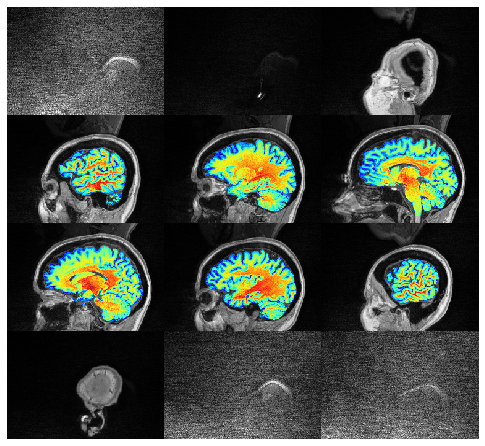

sub-004
ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 176)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (128.7716, 104.5109, -74.4085)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]



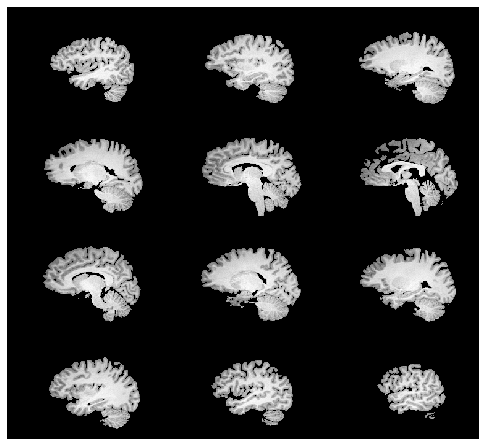

In [95]:
brain = get_brain(0,plot=True)
print(brain)
brain.plot()

ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (160, 64, 64)
	 Spacing    : (1.0, 4.0476, 4.0476)
	 Origin     : (85.3023, 55.3274, -176.5285)
	 Direction  : [-1.     -0.      0.      0.     -0.9763  0.2164  0.      0.2164  0.9763]



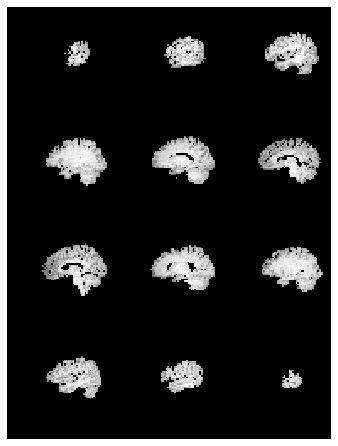

In [93]:
tinyBrain = ants.resample_image(brain,resample_params=(160,64,64),use_voxels=True)
print(tinyBrain)
tinyBrain.plot()

In [92]:
tinyBrain.to_filename(fn)

In [ ]:
fn = '/Volumes/Samsung_T5/DS-use-new-atlas/sub-004/anat/hi.nii'

In [112]:
nsubs = folders.shape[0]
dataArray = np.zeros( (nsubs,1,160,64,64) ) ; dataArray.shape

(131, 1, 160, 64, 64)

In [115]:
for s in range(nsubs):
    print(s)
    brain = get_brain(0,plot=False)
    tinyBrain = ants.resample_image(brain,resample_params=(160,64,64),use_voxels=True)
    dataArray[s,0,:,:,:] = tinyBrain.numpy()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130


In [119]:
ofn = '/Users/aidasaglinskas/Desktop/anatomical'

In [120]:
np.save(ofn,dataArray)